In [71]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze
from itertools import product
from random import randint

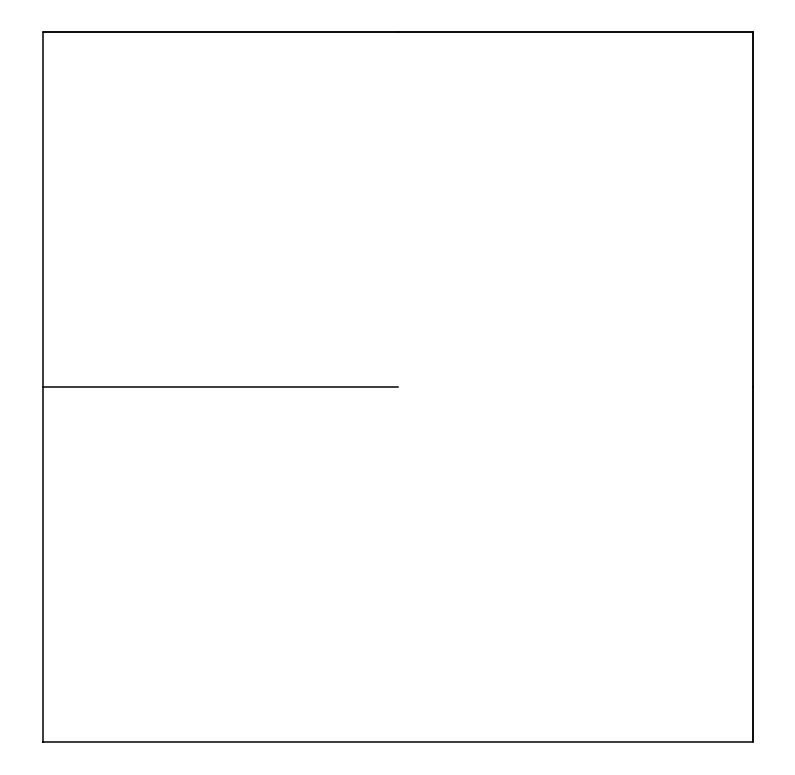

In [72]:
#display_maze(maze)
# set([]) est équivalent à {}

vertices=set([
    (0,0),
    (0,1),
    (1,0),
    (1,1)
])
edges=set([
    ((0,0),(1,0)),
    ((1,0),(0,0)),
    ((0,1),(1,1)),
    ((1,1),(0,1)),
    ((1,1),(1,0)),
    ((1,0),(1,1))
])
   
weights={
    ((0,0),(0,1)):1,
    ((0,1),(0,0)):1
}
display_maze((vertices,edges,weights))


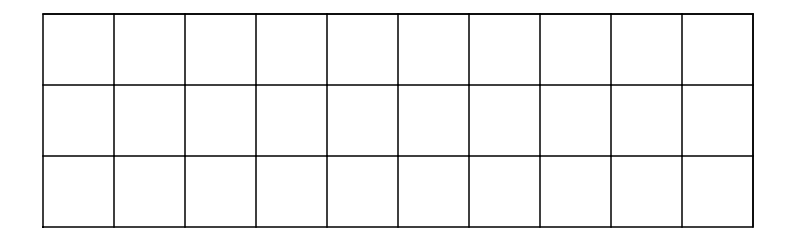

In [73]:
#version perso 
def full_maze(width,height):
    liste=[]
    for i in range(width):
        for j in range(height):
            liste.append((i,j))
    vertices=set(liste)
    edges={}
    weights={}
    display_maze((vertices,edges,weights))

#full_maze(2,2)

#autre méthode 
def full_maze_bis(width,height):
    vertices=set(product(range(width),range(height))) #ou vertices={(col,row) for col,row in product(range(width),range(height))}
    edges=set()
    weights={}
    return (
        vertices,
        edges,
        weights
    )

display_maze((full_maze_bis(10,3)))


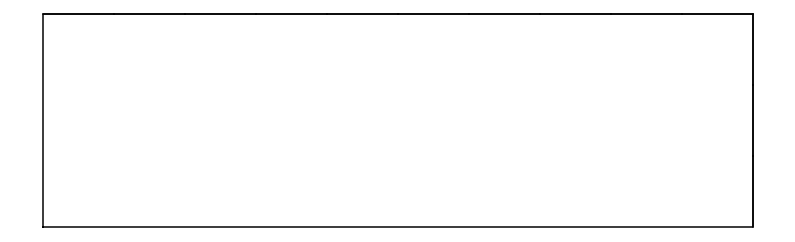

In [74]:
def empty_maze(width,height):
    vertices=set(product(range(width),range(height))) 
    edges_vert={
        ((col,row),(col,row+1))
        for col in range(width)
        for row in range(height-1)
    }

    edges_hor={
        ((col,row),(col+1,row))
        for col in range(width-1)
        for row in range(height)
    }

    edges= edges_vert | edges_hor  # '|' désigne le 'ou' mathématique 
    weights={
        edge:1 for edge in edges 
    }


    return (
        vertices,
        edges,
        weights
    )

display_maze(empty_maze(10,3))

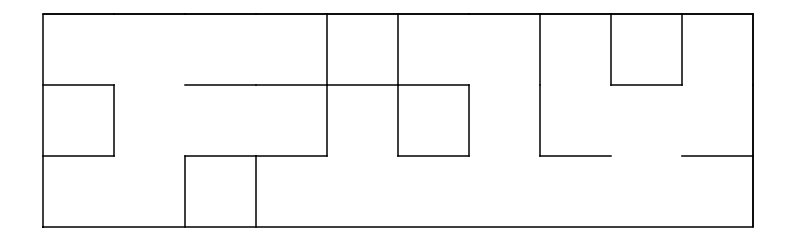

In [75]:
def new_maze(width,height):
    vertices,edges,weigths=empty_maze(width,height)
    edges={edge for edge in edges if (randint(1,2)==1)}
    weights={edge:1 for edge in edges}
    return (
        vertices,
        edges,
        weights
    )

display_maze(new_maze(10,3))

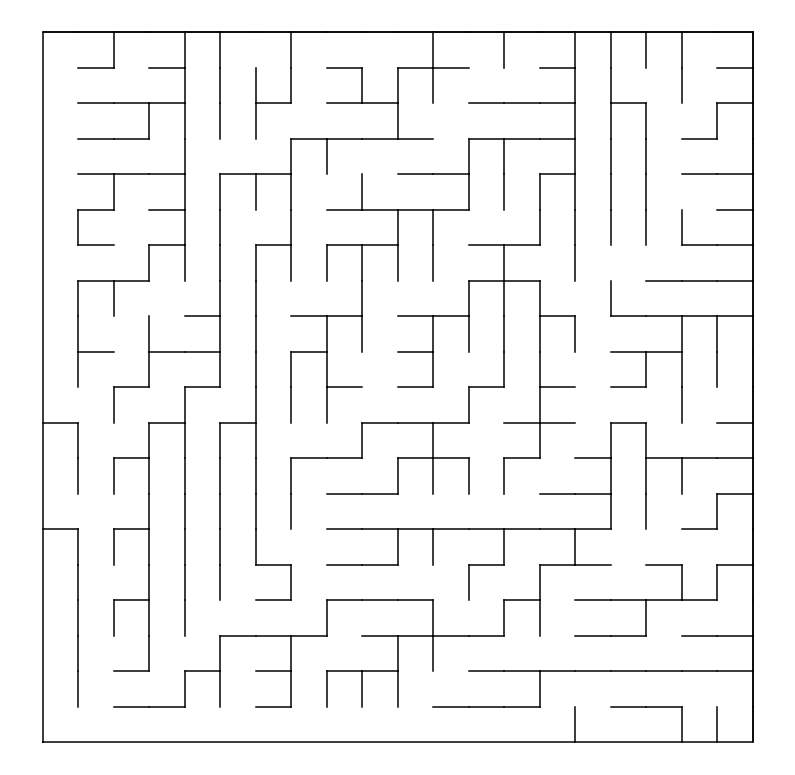

In [86]:
def maze(width,height,starting_point=(0,0)):
    vertices={(col,row) for col in range(width) for row in range(height)}

    directions=[
        (0,+1),
        (0,-1),
        (+1,0),
        (-1,0)
    ]

    edges=set()
    to_visit={starting_point}
    finished=set()
    while len(to_visit)>0:
        current=random.choice(list(to_visit))
        col,row=current

        neighbours={
            (col+dcol, row+drow) for dcol,drow in directions
            if (col+dcol, row+drow) in vertices #ou faire intersection: }.intersection(vertices)
        }
        candidates=neighbours-finished-to_visit

        if len(candidates)>0:
            new=random.choice(list(candidates))
            edges.add((current,new))
            edges.add((new,current))
            to_visit.add(new)

        if len(candidates)<=1:
            finished.add(current)
            to_visit.remove(current)

    weight={edge: 1 for edge in edges }
    return vertices, edges, weight

display_maze(maze(20,20))